In [46]:
import os
import sys
import json
from tqdm import tqdm
from tqdm import tqdm
from ast import literal_eval
import rosbag
import bagpy
from bagpy import bagreader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bag_path = "/home/sankeerth/Videos/2025-05-13-15-50-12.bag"

In [4]:
bag = bagreader(bag_path)
bag.topic_table

[INFO]  Successfully created the data folder /home/sankeerth/Videos/2025-05-13-15-50-12.


,Topics,Types,Message Count,Frequency
0,/atrv/cmd_vel,geometry_msgs/Twist,2302,20.000401
1,/atrv/odom,nav_msgs/Odometry,3565,20.000114
2,/ouster/points,sensor_msgs/PointCloud2,1762,10.002394
3,/rsD455_node0/color/image_raw,sensor_msgs/Image,5345,30.008399
4,/rsD455_node0/depth/image_rect_raw,sensor_msgs/Image,5442,30.022791
5,/tf,tf2_msgs/TFMessage,3565,19.999924
6,/tf_static,tf2_msgs/TFMessage,2,7626.007273
7,/vectornav/INS,vectornav/Ins,7130,40.028096
8,/vectornav/Odom,nav_msgs/Odometry,7128,23.336045


In [5]:
odom = pd.read_csv(bag.message_by_topic("/atrv/odom"))

In [6]:
odom.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.747144e+09,423,1747144212,333062751,odom,base_link,-0.000594,1.257677e-07,0.0,0.0,...,-0.000298,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,-0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.747144e+09,424,1747144212,386002639,odom,base_link,-0.000594,1.257677e-07,0.0,0.0,...,-0.000298,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,-0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.747144e+09,425,1747144212,434944899,odom,base_link,-0.000594,1.257677e-07,0.0,0.0,...,-0.000298,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,-0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.747144e+09,426,1747144212,483888694,odom,base_link,-0.000594,1.257677e-07,0.0,0.0,...,-0.000298,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,-0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.747144e+09,427,1747144212,532863256,odom,base_link,-0.000594,1.257677e-07,0.0,0.0,...,-0.000298,1.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,-0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


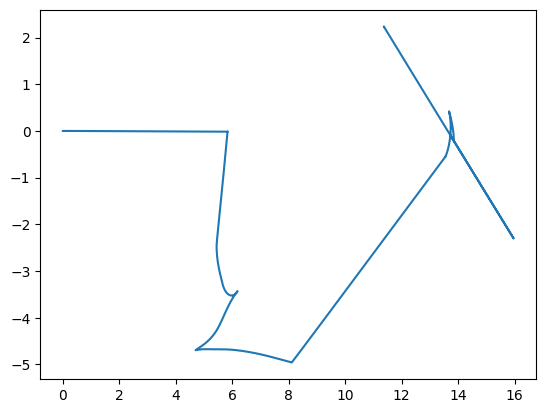

In [7]:
plt.plot(odom['pose.pose.position.x'], odom['pose.pose.position.y'])

In [11]:
pbag_path = "/home/sankeerth/2025-05-17-12-59-40.bag"
pbag = bagreader(pbag_path)
pbag.topic_table

[INFO]  Successfully created the data folder /home/sankeerth/2025-05-17-12-59-40.


,Topics,Types,Message Count,Frequency
0,/onboard_detector/dbscan_bboxes,visualization_msgs/MarkerArray,6385,30.228891
1,/onboard_detector/dynamic_bboxes,visualization_msgs/MarkerArray,6385,30.231179
2,/onboard_detector/filtered_bboxes,visualization_msgs/MarkerArray,6385,30.230961
3,/onboard_detector/history_trajectories,visualization_msgs/MarkerArray,6385,30.233249
4,/onboard_detector/lidar_bboxes,visualization_msgs/MarkerArray,6385,30.238262
5,/onboard_detector/lidar_clusters,sensor_msgs/PointCloud2,6385,30.231833
6,/onboard_detector/tracked_bboxes,visualization_msgs/MarkerArray,6385,30.224643
7,/onboard_detector/uv_bboxes,visualization_msgs/MarkerArray,6385,30.232160
8,/onboard_detector/visual_bboxes,visualization_msgs/MarkerArray,6385,30.231288
9,/yolo_detector/detected_bounding_boxes,vision_msgs/Detection2DArray,5906,30.302818


In [30]:
dbbox = pd.read_csv(pbag.message_by_topic("/onboard_detector/dynamic_bboxes"))

In [31]:
dbbox = dbbox.loc[dbbox.markers!='[]']

In [52]:
markers = []
with rosbag.Bag(pbag_path, 'r') as inbag:
    total_messages = inbag.get_message_count()
    for topic, msg, t in tqdm(inbag.read_messages(), total=total_messages, unit="msgs"):
        if topic == "/onboard_detector/dynamic_bboxes" and msg._type == 'visualization_msgs/MarkerArray':
            if msg.markers!=[]:
                markers.append(msg.markers) 

100%|████████████████████████████████| 63371/63371 [00:00<00:00, 66270.21msgs/s]


In [60]:
dynamic_poses = []
for marker in markers:
    for submarker in marker:
        dynamic_poses.append([submarker.pose.position.x, submarker.pose.position.y])

In [61]:
len(dynamic_poses)

46

In [62]:
dynamic_poses = np.array(dynamic_poses)

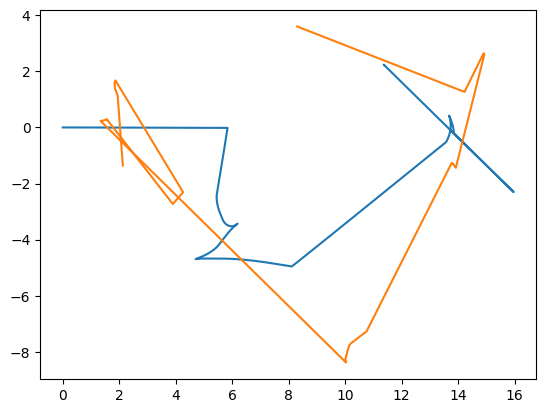

In [63]:
plt.plot(odom['pose.pose.position.x'], odom['pose.pose.position.y'])
plt.plot(dynamic_poses[:, 0], dynamic_poses[:, 1])

In [64]:
markers[0]

[header: 
   seq: 0
   stamp: 
     secs: 0
     nsecs:         0
   frame_id: "map"
 ns: "box3D"
 id: 0
 type: 5
 action: 0
 pose: 
   position: 
     x: 2.127065112827051
     y: -1.3598315092137039
     z: 0.6774049997329712
   orientation: 
     x: 0.0
     y: 0.0
     z: 0.0
     w: 1.0
 scale: 
   x: 0.06
   y: 0.0
   z: 0.0
 color: 
   r: 0.0
   g: 0.0
   b: 1.0
   a: 1.0
 lifetime: 
   secs: 0
   nsecs:  50000000
 frame_locked: False
 points: 
   - 
     x: -0.41079638180180555
     y: -0.26618761100266575
     z: -0.6774049997329712
   - 
     x: -0.41079638180180555
     y: 0.26618761100266575
     z: -0.6774049997329712
   - 
     x: -0.41079638180180555
     y: 0.26618761100266575
     z: -0.6774049997329712
   - 
     x: 0.41079638180180555
     y: 0.26618761100266575
     z: -0.6774049997329712
   - 
     x: 0.41079638180180555
     y: 0.26618761100266575
     z: -0.6774049997329712
   - 
     x: 0.41079638180180555
     y: -0.26618761100266575
     z: -0.6774049997329712